## Graph Isomorphism

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import itertools as it

#### The definition of Graph Isomorphism
According to graph theory, graph isomorphism or the isomorphism of graphs is a 1 to 1 equivalence between two graphs based on each graphs vertices (these being the points at which lines meet one another) all having the same equivalent connections, as their counterparts on the other graph, for example the red and green graphs are isomorphic to one another.

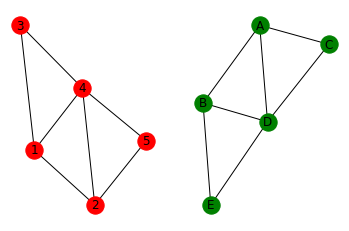

In [2]:
example1 = nx.Graph()
example1Connections = [('1', '2'), ('1', '3'), ('1', '4'), ('3', '4'), ('2', '5'), ('2', '4'), ('4', '5')]
example1.add_edges_from(example1Connections)


example2 = nx.Graph()
example2Connections = [('A', 'B'), ('A', 'C'), ('A', 'D'), ('C', 'D'),('B', 'E'), ('B', 'D'), ('D', 'E')]
example2.add_edges_from(example2Connections)

plt.subplot(121)
nx.draw(example1, with_labels=True, node_color="red")


plt.subplot(122)
nx.draw(example2, with_labels=True, node_color="green")

plt.show()

## The Graph Isomorphism Problem
The graph isomorphism problem is a problem of determining whether or not two graphs can be said to be isomorphic.

To answer the probllem and determine if two graphs are isomorphic one of the simplest albeit slowest methods is to construct adjacency tables for the graphs, for example a rendition of the red graph's adjacency table is below.

In [4]:
data = nx.to_numpy_array(example1).astype(np.uint8)
pd.DataFrame(data, columns=[1, 2, 3, 4, 5])

,1,2,3,4,5
0,0,1,1,1,0
1,1,0,0,1,1
2,1,0,0,1,0
3,1,1,1,0,1
4,0,1,0,1,0


After we have created adjacency tables to present the graphs, we nust then take our first graphs adjacency table and compare it against all possible permutations of the second graphs adjacency table.
If any of the permutations match, then it can be said that the two graphs are isomorphic.

Though this is a valid solution to the problem, it is heavily crippled by the fact that it has a runtime complexity o(n!), meaning that as the number of elements in the graphs increase, the runtime increasing factorially, rendering this impractical for large graphs.

## Function to Determine Isomorphism of two graphs
The functions below have been put together for the purpose of detecting the isomorphism of two graphs

In [ ]:
# The reason for the ordering of the function is to ensure that each has been declared before it is called

# To determine whether two graphs are isomorphic, the two graphs are converted into adjacency tables
# The adjacency table of the first graph, is then compared to all possible permutations of the adjacency table of the second graph
# If for any the permutations, the two tables are found to be the same, the graphs are proven to be isomorphic

# The purpose of this function is to enable the program to swap the points within the array
# This is important as we need to test all valid arrangements of the points of a graph,
# Before it can be said for certain that two graphs are not isomorphic

# This function takes a numpy_array, two integers as arguments
# The integers represent the points to swapped
def rearrange_array(arr, firstPoint, secondPoint):
    # First all relevant values for the points on the y axes of the array are swapped in the below for loop
    for i in range(len(arr)):
        arr[i][firstPoint], arr[i][secondPoint] = arr[i][secondPoint], arr[i][firstPoint]
    
    # The points are then swapped on the x axes
    tempArr = arr[firstPoint].copy()
    arr[firstPoint] = arr[secondPoint]
    arr[secondPoint] = tempArr
    
    # The numpy array representing the adjacency of table of the graph is returned, with the points swapped
    return arr


# The purpose of this function is to test all possible permutations of the adjacency tables to determine isomorphism
# The implementation for this function is derived from this source: https://www.geeksforgeeks.org/heaps-algorithm-for-generating-permutations/
# The implementation has been altered to suit the requirements of this algorithm

# This functions takes two numpy_arrays and an integer as arguments
def test_permutation(arrayToMatch, arrayToChange, size):
    
    # Once the size variable has reached 1, the permutation has been successfully generated and is ready to be compared
    # The results of the comparison are returned to the calling function
    if size == 1:
        return np.array_equal(arrayToMatch, arrayToChange)
    
    # The for loop iterates through every element in the array, in this case representing the points of the graph,
    for i in range(size):
        
        # The function is called recursively, with the arrays passed in alongside, and a reduced size value
        
        result = test_permutation(arrayToMatch, arrayToChange, size - 1)
        
        # If the test is successful,the success is immediately returned, as no more test are required 
        if result == True:
            return result
        
        # When the value of size is odd, the first and last points are swapped
        if size % 2 == 1:
            arrayToChange = rearrange_array(arrayToChange, 0, size -1)
        # When the value of size is even, the point represented by i and the last point are swapped
        else:
            arrayToChange = rearrange_array(arrayToChange, i, size -1)
            
        return False

            
# This is the function responsible for utlizing the 2 earlier defined functions
# This functions takes two networkx graphs as arguments
def isomorphism_test(graph1, graph2):
    
    # The two networkx graphs are converted to numpy_arrays, which are used to represent the graphs adjacency tables
    graph1AdjacencyTable = nx.to_numpy_array(graph1).astype(np.uint8)
    graph2AdjacencyTable = nx.to_numpy_array(graph2).astype(np.uint8)
    
    # The test_permutation function is called to test all permutations of graph 2 against graph 1
    return test_permutation(graph1AdjacencyTable, graph2AdjacencyTable, len(graph2AdjacencyTable))

print(isomorphism_test(example1, example2))